# Doughnuts
Pie charts with a doughnut shape where the thickness of the doughnut indicates the total
number of points in the pie chart relative to a reference total. Based on Figs. 1/2 in
[Roberts et al. (2020) - Impact of Model Resolution on Tropical Cyclone Simulation Using the HighResMIP–PRIMAVERA Multimodel Ensemble](https://doi.org/10.1175/JCLI-D-19-0639.1)

## Default Examples

([<matplotlib.patches.Wedge at 0x7f687bcbe750>,
 [Text(0.5499999702695115, 0.9526279613277875, ''),
  Text(-0.5499998810780428, -0.9526280128224968, '')],
 [])

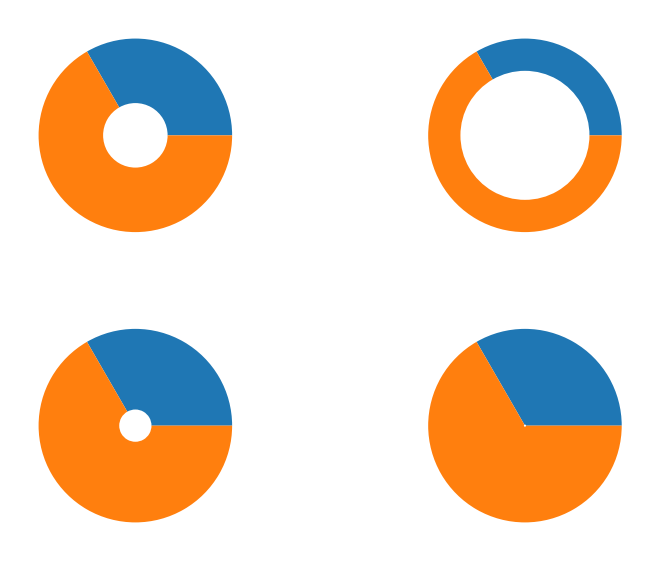

In [2]:
import matplotlib.pyplot as plt
import huracanpy

fig, axes = plt.subplots(2, 2)

# Default doughnut
# thickness = 2/3 of the pie
huracanpy.plot.doughnut([1, 2], 3, ax=axes[0, 0])

# Less data than reference total - thinner doughnut
huracanpy.plot.doughnut([1, 2], 6, ax=axes[0, 1])

# More data than reference total - thicker doughnut
huracanpy.plot.doughnut([1, 2], 1.5, ax=axes[1, 0])

# Much more data
huracanpy.plot.doughnut([1, 2], 0.1, ax=axes[1, 1])

## IBTrACS Example

In [122]:
import numpy as np

ibtracs = huracanpy.load(tracker="ibtracs", ibtracs_online=False)
genesis_points = ibtracs.groupby("track_id").first()

# Unfortunately the basin needs to be converted to a string to use np.unique, but "NA"
# is interpreted as a NaN
basins, counts = np.unique(genesis_points.basin.astype(str), return_counts=True)
basins[basins == "nan"] = "NA"

/home/lsaffin/Documents/meteorology/programming/huracanpy/huracanpy/_data/ibtracs.py:90: UserWarning: This offline function loads a light version of IBTrACS which is embedded within the package, based on a file produced manually by the developers.
                  It was last updated on the 24nd May 2024, based on the IBTrACS file at that date.
                  It contains only data from 1980 up to the last year with no provisional tracks. All spur tracks were removed. Only 6-hourly time steps were kept.
  warnings.warn(
/home/lsaffin/Documents/meteorology/programming/huracanpy/huracanpy/_data/ibtracs.py:96: UserWarning: You are loading the IBTrACS-WMO subset.                       This dataset contains the positions and intensity reported by the WMO agency responsible for each basin
                      Be aware of the fact that wind and pressure data is provided as they are in IBTrACS,                       which means in particular that wind speeds are in knots and averaged over 

Text(0.5, 1.0, 'IBTrACS - Storm distibution by basin')

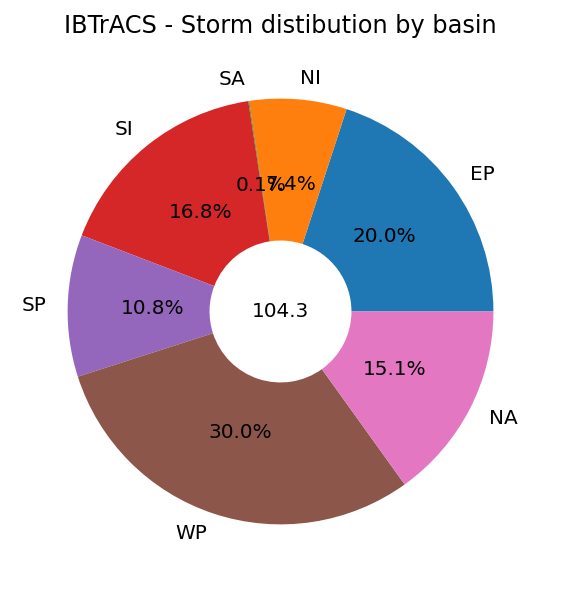

In [124]:
wedges, labels, percentage_labels = huracanpy.plot.doughnut(
    counts, sum(counts), labels=basins, autopct="%.1f%%"
)

# Set the centre text to the average number of storms per year
# I'm not sure if the first and last year in the data are full years, so this may be an
# underestimate, but I'll keep it simple for the example
per_year = sum(counts) / len(set(ibtracs.time.dt.year.values))
plt.text(0, 0, f"{per_year:.1f}", ha="center", va="center")

plt.title("IBTrACS - Storm distibution by basin")

## Recreating the doughnuts from Roberts et al. (2020)

In [31]:
import xarray as xr

# Create the input data as you might expect to produce it with huracanpy/xarray
# A 2d array of average number of storms per year as a function of model and basin
da = xr.DataArray(
    data=[
        np.array([16, 53, 19, 5, 7]) * 0.521,
        np.array([17, 46, 23, 7, 7]) * 0.873,
        np.array([16, 46, 16, 17, 5]) * 0.509,
        np.array([17, 46, 18, 15, 5]) * 0.581,
        np.array([13, 45, 20, 18, 4]) * 0.249,
        np.array([14, 44, 20, 18, 4]) * 0.42,
        np.array([22, 42, 12, 18, 5]) * 0.662,
        np.array([23, 44, 9, 20, 4]) * 0.654,
        np.array([21, 33, 19, 22, 5]) * 0.14,
        np.array([19, 35, 19, 22, 4]) * 0.133,
        np.array([11, 32, 21, 28, 8]) * 0.296,
        np.array([14, 39, 21, 18, 8]) * 0.649,
        np.array([17, 40, 28, 11, 4]) * 0.648,
        np.array([19, 39, 26, 10, 6]) * 0.627,
        np.array([18, 45, 20, 12, 5]) * 0.495,
        np.array([18, 42, 23, 13, 4]) * 0.617,
        np.array([21, 38, 24, 11, 6]) * 0.729,
        np.array([21, 42, 28, 8, 1]) * 0.536,
    ],
    coords=dict(
        model=[
            "HadGEM3-GC31-LM",
            "HadGEM3-GC31-HM",
            "ECMWF-IFS-LR",
            "ECMWF-IFS-HR",
            "EC-Earth3P-LR",
            "EC-Earth3P-HR",
            "CNRM-CM6-1",
            "CNRM-CM6-1-HR",
            "MPI-ESM1-2-HR",
            "MPI-ESM1-2-XR",
            "CMCC-CM2-HR4",
            "CMCC-CM2-VHR4",
            "MERRA2",
            "JRA55",
            "ERAI",
            "ERA5",
            "CFSR2",
            "Obs",
        ],
        basin=["na", "wp", "ep", "ni", "other"],
    ),
)

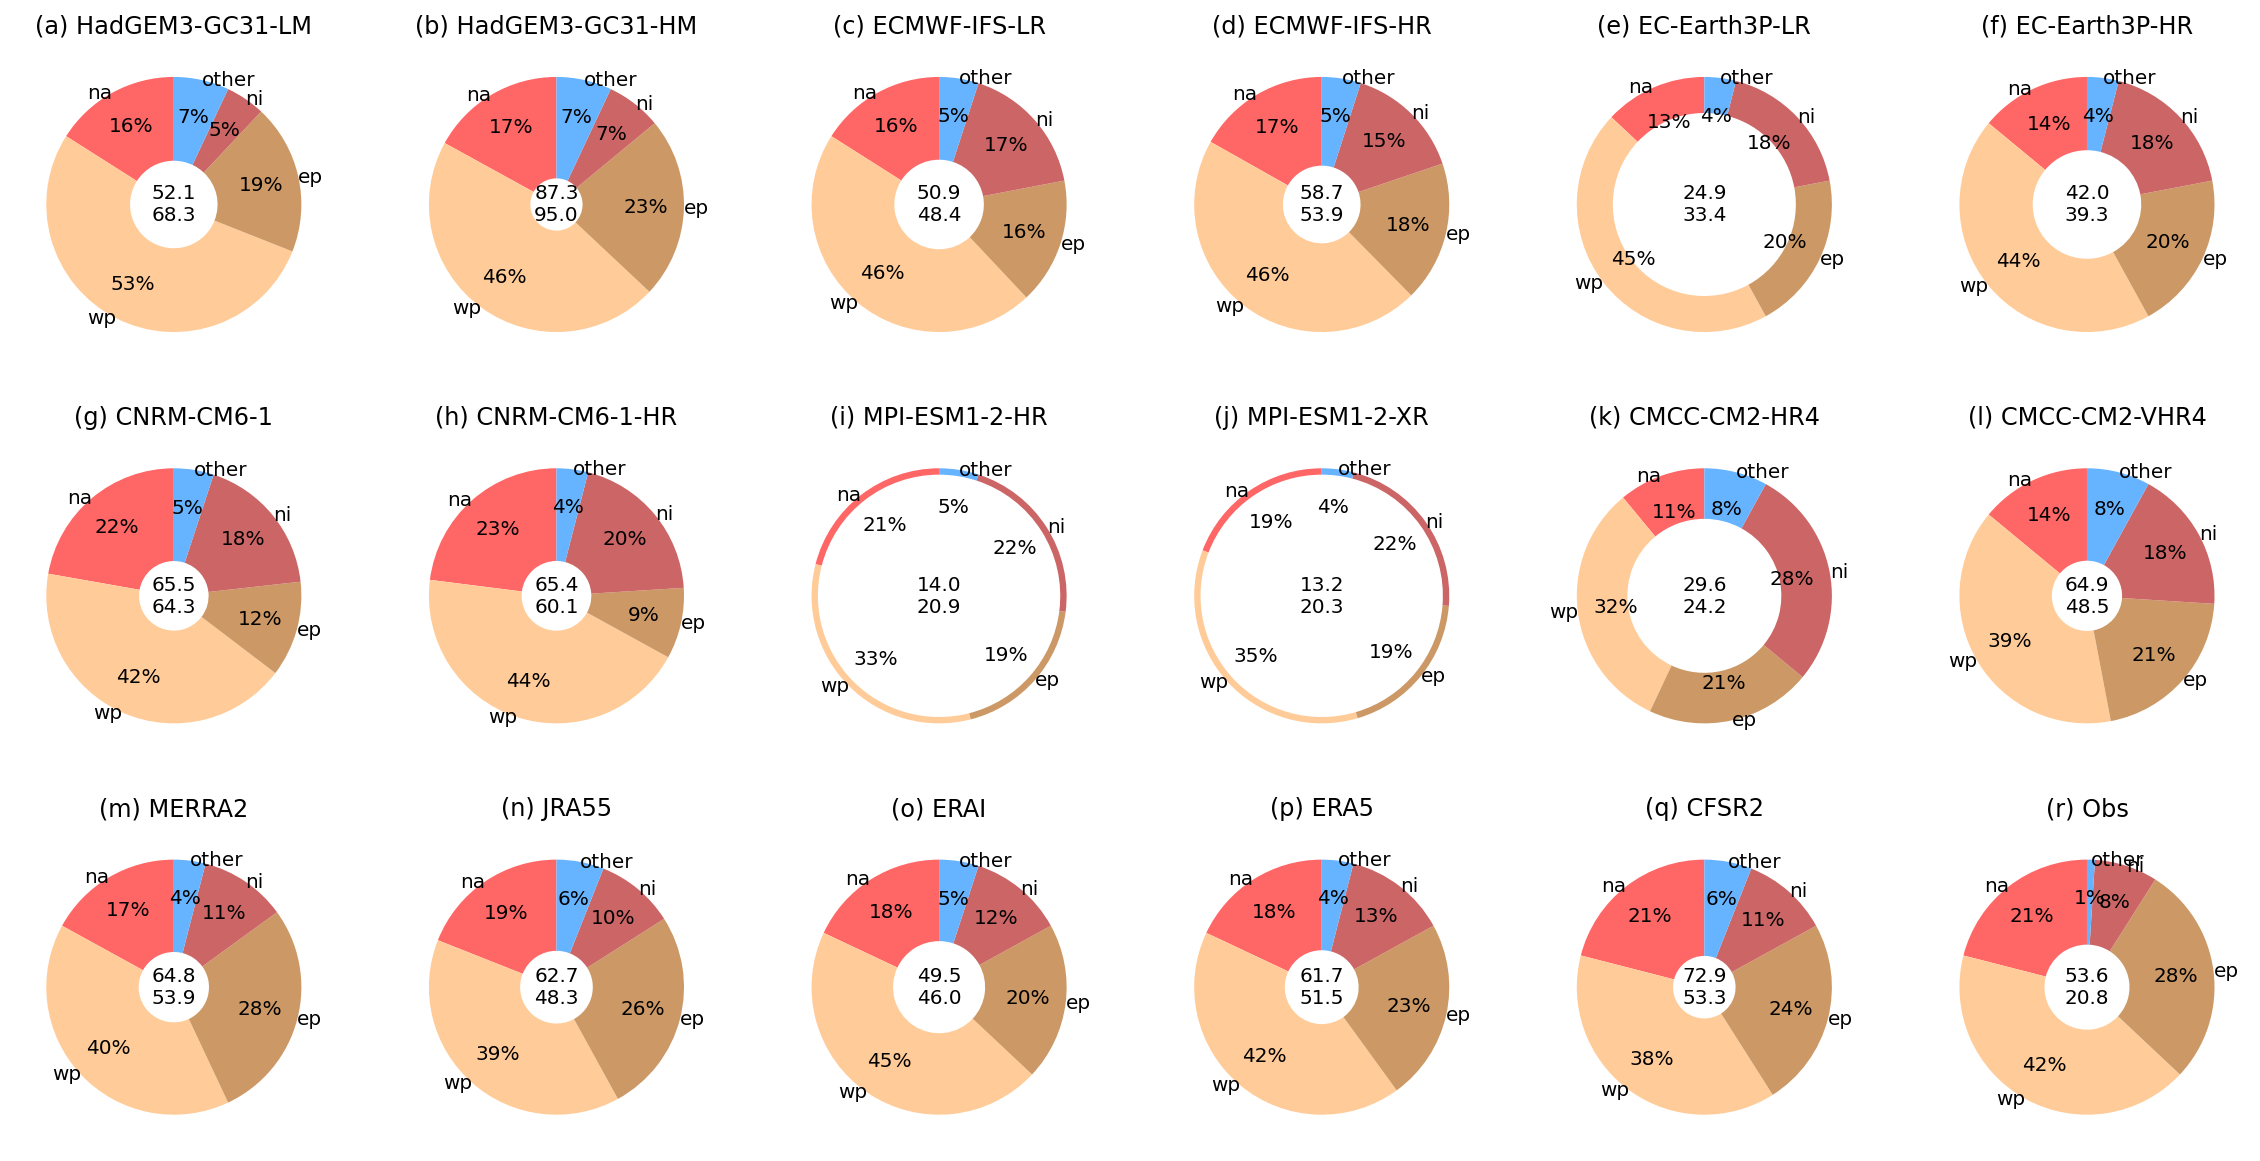

In [125]:
from string import ascii_lowercase

# Specific parameters to plt.pie used by Roberts et al. (2020). See
# https://github.com/eerie-project/storm_track_analysis/blob/main/assess/tc_assessment.py#L384
pie_kwargs = dict(
    startangle=90,
    autopct="%1.0f%%",
    pctdistance=0.7,
    labels=da.basin.values,
    labeldistance=1.0,
    colors=["#ff6666", "#ffcc99", "#cc9966", "#cc6666", "#66b3ff"],
)
# The second value in the centre is the number of southern hemisphere storms
# This isn't related to the data in the doughnut so I've just put a list of values here
sh_values = [
    68.3,
    95.0,
    48.4,
    53.9,
    33.4,
    39.3,
    64.3,
    60.1,
    20.9,
    20.3,
    24.2,
    48.5,
    53.9,
    48.3,
    46.0,
    51.5,
    53.3,
    20.8,
]

fig, axes = plt.subplots(3, 6, figsize=(20, 10))
axes = axes.flatten()

# Thickness of doughnuts relative to the "Obs" doughnut
reference_total = da.sel(model="Obs").values.sum()

# One plot for each model. Loop over array per model
for n, model in enumerate(da.model.values):
    da_ = da.sel(model=model)

    huracanpy.plot.doughnut(da_.values, reference_total, ax=axes[n], **pie_kwargs)
    axes[n].text(
        0, 0, f"{da_.values.sum():.1f}\n{sh_values[n]}", ha="center", va="center"
    )
    axes[n].set_title(f"({ascii_lowercase[n]}) {model}")